# 🧹 Handling Missing Data

Missing data is one of the most common and critical issues in any real-world dataset.  
How you handle missing values directly impacts the performance and reliability of your machine learning model.

---

## 📘 Introduction

📌 **Definition:**  
> Missing data refers to the absence of values in one or more features (columns) of a dataset.  

In real-world datasets, missing values occur due to:
- 🧾 Data collection or entry errors  
- 🔄 System or sensor failures  
- 🧩 Merging datasets from multiple sources  
- 🙈 Non-response in surveys  

Proper handling of missing data ensures that the dataset remains **clean**, **consistent**, and **usable** for analysis and model training.

---

## 2️⃣ Types of Missing Data

There are **three main types** of missing data, based on the underlying mechanism causing the missingness:

1. **MCAR – Missing Completely At Random**  
2. **MAR – Missing At Random**  
3. **MNAR – Missing Not At Random**

Let’s break them down 👇

---

### 🔹 Type 1: MCAR — *Missing Completely At Random*

📘 **Definition:**  
The probability of a data point being missing is **completely independent** of both the observed and unobserved data.  
That is, there is **no systematic relationship** between missingness and any other variable.

$$[
P(M | X, Y) = P(M)
]$$

Where:  
- ( M \) → Missingness indicator (1 = missing, 0 = observed)  
- \( X, Y \) → Data variables  

🧩 **Example:**  
A survey response was lost in transmission due to a technical glitch — the loss has nothing to do with the participant’s age, gender, or income.

✅ **Handling Tip:**  
Since MCAR introduces no bias, you can safely handle it by **deletion** (dropping rows or columns) or **simple imputation** (mean, median, or mode).

---

### 🔹 Type 2: MAR — *Missing At Random*

📘 **Definition:**  
The probability of missingness depends on **observed data**, but **not** on the missing value itself.  
In other words, missingness is related to other known variables in the dataset.

$$[
P(M | X, Y) = P(M | X)
]$$

🧩 **Example:**  
Older participants in a survey may be less likely to report their income.  
Here, the missingness in *Income* depends on *Age* (which is observed), not on the *Income* value itself.

✅ **Handling Tip:**  
Use **statistical or model-based imputation** — for instance, fill missing income values based on age groups or regression models.

---

### 🔹 Type 3: MNAR — *Missing Not At Random*

📘 **Definition:**  
The probability of missingness is related to the **value itself** that is missing.  
In this case, missingness is **systematic** and cannot be explained by other observed variables.

$$[
P(M | X, Y) = P(M | Y)
]$$

🧩 **Example:**  
People with very high income may intentionally choose not to disclose it.  
Here, missingness depends directly on the income value itself.

⚠️ **Handling Tip:**  
This is the most complex type.  
You’ll need **domain knowledge** or **advanced imputation techniques** (like Expectation-Maximization, regression models, or KNN imputation).

---

## 🧾 Summary of Types of Missing Data

| Type | Full Form | Dependency | Example | Handling Strategy |
|------|------------|-------------|----------|----------------|
| **MCAR** | Missing Completely at Random | None | Randomly lost survey form | Safe to drop or simple imputation |
| **MAR** | Missing At Random | Related to observed data | Older people skip income question | Impute using related variables |
| **MNAR** | Missing Not At Random | Related to missing value itself | Rich people hide income | Use model-based or domain-specific methods |

---

✅ **Next Step:**  
In the next section, we’ll see **how to detect missing values in Pandas** using `.isnull()`, `.info()`, and visualizations with Seaborn heatmaps.


## 🔍 Checking Missing Values

Now that we understand the **types of missing data**, let’s learn how to **detect and inspect missing values** in a real-world dataset.  

We’ll use the famous **Titanic** dataset from Seaborn — a classic dataset that contains information about passengers like age, sex, class, fare, and survival status.

---


In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# 🛳️ Load Titanic dataset
titanic_data = sns.load_dataset('titanic')

# 👀 Display first few rows
display(titanic_data.head())


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


✅ The Titanic dataset contains 891 rows and 15 columns, including both **numerical** and **categorical** variables.

Now, let's check how many missing values each column has.

In [37]:
# 🔹 Checking missing values
titanic_data.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 🧾 Output Interpretation

The result shows how many **null (NaN)** values each column contains.

- Columns like `deck`, `age`, and `embarked` have several missing entries.  
- Columns like `survived`, `pclass`, `sex`, and `fare` are complete (no missing data).  

📘 **Explanation:**
- `isnull()` → Returns a Boolean DataFrame (True = Missing, False = Not Missing)
- `sum()` → Counts the number of missing values per column

---

### 💡 Pro Tip:
You can also view the percentage of missing data in each column:

```python
titanic_data.isnull().mean().round(2) * 100
```

In [38]:
# Percentage of missing data
titanic_data.isnull().mean().round(2) * 100

survived        0.0
pclass          0.0
sex             0.0
age            20.0
sibsp           0.0
parch           0.0
fare            0.0
embarked        0.0
class           0.0
who             0.0
adult_male      0.0
deck           77.0
embark_town     0.0
alive           0.0
alone           0.0
dtype: float64

## 🗑️ Handling Missing Data — The Easiest Way 😅  
### ➤ Deleting Rows or Data Points with Missing Values

The simplest way to handle missing data is to **remove the rows (or columns)** that contain null values.  

📘 This method is effective when:
- The percentage of missing data is **very small (less than 5%)**, and  
- The missing values are **randomly distributed (MCAR)**.

Let’s see how this works in practice 👇


In [39]:
# 🔹 Check the original shape of the dataset
print("Before deleting:", titanic_data.shape)


Before deleting: (891, 15)


✅ This shows the current number of **rows and columns** in our dataset before deletion.

Now, we’ll remove all rows that contain **at least one missing value**.


In [40]:
# 🧹 Drop rows with missing values
titanic_cleaned = titanic_data.dropna()

# 🔹 Check shape after dropping
print("After deleting:", titanic_cleaned.shape)


After deleting: (182, 15)


### 🧾 Output Interpretation

- The **before** shape tells us the original dataset dimensions (e.g., 891 rows × 15 columns).  
- The **after** shape shows how many rows remain after removing all records with at least one `NaN`.  

🧩 **Example Insight:**  
If many rows are dropped (say from 891 → 183), that means too much information was lost.  
In that case, deletion may **not be ideal** — we’ll need **imputation** instead.

---

### ⚠️ When *Not* to Delete
- If missing values appear in **important columns** (like `Age` or `Fare`)  
- If the dataset becomes **too small** after deletion  
- If the data is **not missing completely at random (MCAR)**  

✅ **Best Practice:**  
Always check the **percentage of missing data** before deciding to drop rows or columns.


## 🧱 Deleting Columns with Missing Values  

Sometimes, a particular **column** has too many missing values —  
to the point that imputing or filling them no longer makes sense.  

In such cases, it’s better to **drop the entire column** rather than keeping unreliable or incomplete data.

---

### 📊 Example: Titanic “deck” Column  

In the Titanic dataset, the `deck` column has **688 missing values** out of 891 —  
that’s nearly **77% of the data missing!** 😱  

Let’s confirm this and then remove it.


In [41]:
# 🛳️ Load Titanic dataset
titanic_data = sns.load_dataset('titanic')

# 🔍 Check missing values in 'deck' column
titanic_data['deck'].isnull().sum()

np.int64(688)

✅ The output shows that `deck` has 688 missing entries, making it a poor feature to keep.

Let’s delete the column entirely.


In [42]:
# 🗑️ Drop the 'deck' column (column-wise deletion)
titanic_data.drop('deck', axis=1, inplace=True)

# ✅ Check remaining columns
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


### 🧾 Output Interpretation

- The `deck` column is now **removed** from the DataFrame.  
- The rest of the columns remain intact.  

---

### ⚙️ Alternate Syntax
If you want to drop multiple columns that contain missing data beyond a threshold (say 50%),  
you can automate it like this:


In [43]:
# 🔹 Drop columns where more than 50% of the data is missing
threshold = len(titanic_data) * 0.5
titanic_data = titanic_data.dropna(thresh=threshold, axis=1)

print("Remaining Columns:", titanic_data.columns.tolist())


Remaining Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']


✅ **Best Practice:**
- Drop columns **only if** they have **excessive missing data (e.g., >50%)**  
- For columns with moderate missingness, prefer **imputation** instead of deletion  

---

### 💡 Summary

| Action | Command | When to Use |
|---------|----------|-------------|
| Drop rows | `df.dropna()` | Few missing values randomly scattered |
| Drop columns | `df.drop('column', axis=1)` | Column has too many missing values |
| Conditional drop | `df.dropna(thresh=n)` | Drop based on missing value threshold |

---

✅ **Next Step:**  
Now that we know how to delete rows and columns, let’s move to **Filling Missing Values (Imputation)** — using mean, median, mode, and advanced imputers.


## 🔧 Imputation — Handling Missing Values Without Losing Data  

Instead of deleting data points with missing values, we can **fill (impute)** them with reasonable estimates.  
This helps us **preserve data** while still making it usable for analysis and machine learning models.

---

### 📘 Why Impute?

🧠 Imputation replaces missing values with *meaningful substitutes* so that:  
- We **retain** maximum data  
- We **reduce bias** caused by deletion  
- Our ML models can **process the dataset** without errors  

---

### 🔹 Common Imputation Strategies

| Type | Description | Suitable For | Example |
|------|--------------|--------------|----------|
| **Mean Imputation** | Replace missing value with the column mean | Numerical data | Age, Fare |
| **Median Imputation** | Replace with the median | Skewed numerical data | Income, House Price |
| **Mode Imputation** | Replace with the most frequent value | Categorical data | Gender, Embarked |
| **Constant / Custom Value** | Replace with a fixed value | Categorical / missing tags | “Unknown”, 0 |

---

### ⚙️ Example: Titanic Dataset  

Let’s perform imputation for the columns `age`, `embarked`, and `embark_town` in the Titanic dataset.


## 📈 Visualizing Data Distribution — Using `sns.displot()`

After handling missing values (imputation), it’s a good idea to **visualize the distribution** of the variable.  
This helps us ensure:
- The imputed values look reasonable,  
- No unwanted skew or distortion was introduced, and  
- We can visually understand the feature’s spread and shape.

---

### 🔹 What is `sns.displot()`?

📘 **Definition:**  
`seaborn.displot()` is a **distribution plot function** that shows how the data values are distributed — combining features of:
- **Histogram**
- **Kernel Density Estimate (KDE)**
- **Rug plot**

It’s an all-in-one high-level function for visualizing the distribution of **a single continuous variable**.

---

### 💡 Syntax

```python
sns.displot(data, bins=None, kde=False, color=None)
```

| Parameter | Description                               |
| --------- | ----------------------------------------- |
| `data`    | The column or array you want to visualize |
| `bins`    | Number of bins in the histogram           |
| `kde`     | Whether to show a smooth density curve    |
| `color`   | Color of the bars or curve                |


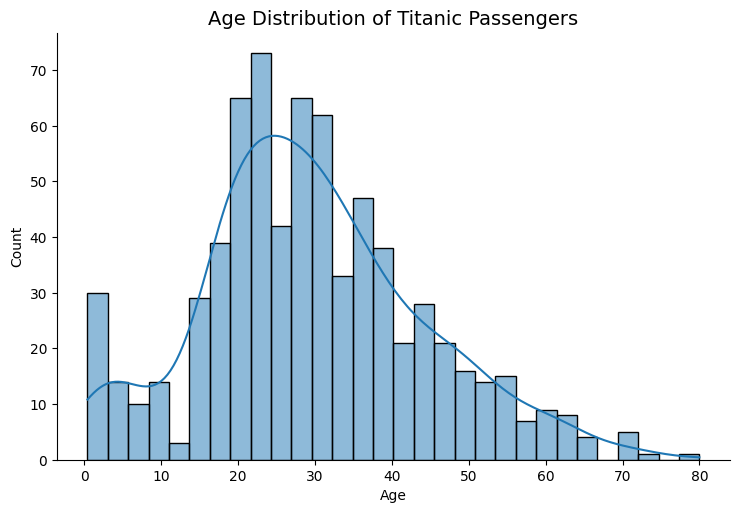

In [44]:
sns.displot(titanic_data['age'], kde=True, bins=30, height=5, aspect=1.5)
plt.title("Age Distribution of Titanic Passengers", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## 📊 Mean Imputation — Best for Normally Distributed Data  

Mean imputation is one of the **simplest and fastest** ways to fill missing values.  
It replaces all missing entries with the **average (mean)** value of that feature.  

📘 **When to Use:**  
✅ Works well when the feature follows a **normal (bell-shaped)** distribution.  
⚠️ Not recommended for **skewed** data because the mean can be distorted by outliers.

---

### 💡 Formula

$$[
\text{Mean Imputation: } x_i = 
\begin{cases} 
x_i & \text{if } x_i \text{ is not missing} \\
\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n} & \text{if } x_i \text{ is missing}
\end{cases}
]$$


In [48]:
# 🛳️ Load Titanic dataset
titanic_data = sns.load_dataset('titanic')

# 🔹 Mean imputation for 'age'
titanic_data['age_mean'] = titanic_data['age'].fillna(titanic_data['age'].mean())

# ✅ Verify the new column
titanic_data[['age', 'age_mean']].head(10)

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
5,NaN,29.699118
6,54.0,54.000000
7,2.0,2.000000
8,27.0,27.000000
9,14.0,14.000000


✅ Here, the missing values in the `age` column are replaced with the **mean age** of all passengers.  
We also created a new column `age_mean` to compare before and after imputation.

---

### 🔍 Let’s visualize the effect of mean imputation


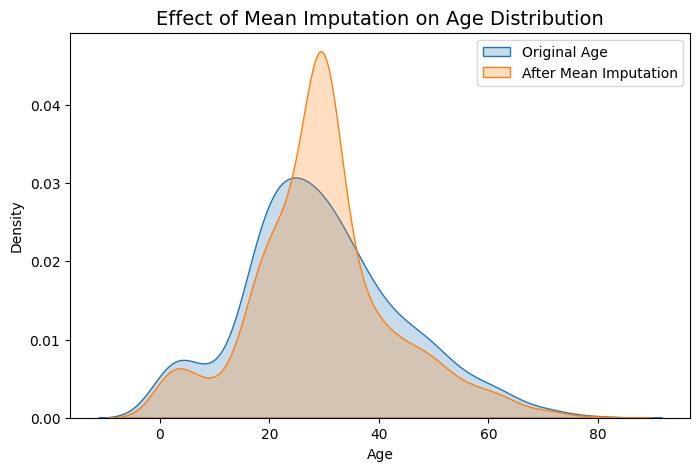

In [49]:
# 📈 Compare original vs mean-imputed age distribution
plt.figure(figsize=(8,5))
sns.kdeplot(titanic_data['age'], label='Original Age', fill=True)
sns.kdeplot(titanic_data['age_mean'], label='After Mean Imputation', fill=True)
plt.title("Effect of Mean Imputation on Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.legend()
plt.show()


### 🧾 Output Interpretation

✅ You can see both curves almost **overlap perfectly** —  
because the mean is a central measure that fits well when the data is **normally distributed**.

However 👇  
If the distribution is **skewed** (like income or fare data),  
mean imputation can **bias** the results by pulling the central tendency towards outliers.

---

### ⚠️ When Not to Use Mean Imputation

| Situation | Problem |
|------------|----------|
| Data is skewed | Mean gets pulled by outliers |
| Data has extreme values | Imputed values look unnatural |
| Feature is categorical | Mean doesn’t make sense |

✅ In such cases, **median imputation** or **mode imputation** is preferred.

---

### 📊 Quick Recap

| Technique | Works Best For | Sensitive To Outliers | Suitable Example |
|------------|----------------|------------------------|------------------|
| **Mean Imputation** | Normally distributed numerical data | ✅ Yes | Age |
| **Median Imputation** | Skewed numerical data | ❌ No | Fare, Income |
| **Mode Imputation** | Categorical data | ❌ No | Embarked, Sex |

---

✅ **Next Step:**  
Let’s move on to **Median Imputation** — perfect for **skewed** or **non-normal** data distributions (like `fare` in Titanic dataset).


## 📊 Median Imputation — When Data Has Outliers  

When a dataset contains **outliers** or is **skewed**,  
mean imputation can be misleading because the mean gets pulled towards the extreme values.  

In such cases, the **median** — the *middle value* when data is sorted — is a more **robust** measure of central tendency.

---

### 💡 Formula

$$[
\text{Median Imputation: } x_i = 
\begin{cases} 
x_i & \text{if } x_i \text{ is not missing} \\
\tilde{x} = \text{median}(X) & \text{if } x_i \text{ is missing}
\end{cases}
]$$

✅ The **median** is unaffected by outliers, making it ideal for imputation in **skewed datasets**.


In [55]:
# 🔧 Create median imputed versions of 'age'
titanic_data['age_median'] = titanic_data['age'].fillna(titanic_data['age'].median())

# 🧾 Compare side by side
titanic_data[['age', 'age_mean', 'age_median']].head(10)

,age,age_mean,age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
5,NaN,29.699118,28.0
6,54.0,54.000000,54.0
7,2.0,2.000000,2.0
8,27.0,27.000000,27.0
9,14.0,14.000000,14.0


✅ The columns show:
- **age** → original data (with missing values)  
- **age_mean** → missing values filled with the mean  
- **age_median** → missing values filled with the median  

---

### 📈 Compare Original vs. Mean vs. Median Imputation


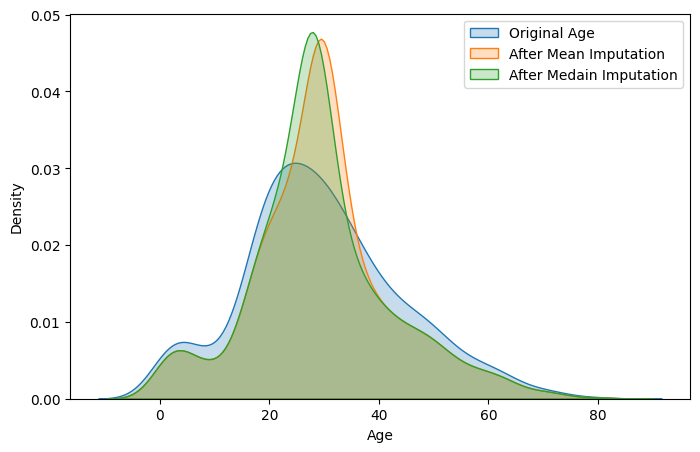

In [56]:
# 📈 Compare original vs mean vs median-imputed age distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(titanic_data['age'], label='Original Age', fill=True)
sns.kdeplot(titanic_data['age_mean'], label='After Mean Imputation', fill=True)
sns.kdeplot(titanic_data['age_median'], label='After Medain Imputation', fill=True)
plt.xlabel('Age')
plt.legend()
plt.show()

### 🧾 Output Interpretation

✅ The **mean-imputed** curve may slightly shift towards higher ages  
because the mean is affected by a few older passengers (outliers).

✅ The **median-imputed** curve closely follows the original distribution —  
indicating that median imputation preserved the dataset’s natural structure better.

---

### ⚙️ When to Use Median Imputation

| Scenario | Recommended? | Why |
|-----------|---------------|-----|
| Data is **normally distributed** | ❌ | Mean works better |
| Data has **outliers or skewness** | ✅ | Median is robust |
| Feature is **numeric** | ✅ | Median only applies to numbers |
| Feature is **categorical** | ❌ | Use mode instead |

---

### 💬 Key Takeaway

📌 **Mean Imputation** → works for *normal* data (sensitive to outliers)  
📌 **Median Imputation** → works for *skewed* data (robust to outliers)  

---

## 🎯 Understanding Outliers and Skewness (Simple Explanation)

---

### 🔹 What are Outliers?

**Outliers** are data points that are **very different** from the rest of the values.

📘 **Example:**  
If we have ages like `[25, 26, 27, 28, 95]`  
→ Everyone is around 25–28, but 95 is too high.  
So **95 is an outlier**.

🧠 Outliers can make the **mean (average)** go up or down too much.  
That’s why when outliers are present, we use the **median** instead of the mean.

---

### 🔹 What is Skewness?

**Skewness** means the data is **not balanced** on both sides.  
It’s “tilted” to one side — either left or right.

📘 **Example:**  
Salaries = `[20k, 25k, 30k, 40k, 1,00,000]`  
Most people earn around 20–40k, but one person earns 1 lakh.  
So the graph tail goes **to the right** — this is called **Right Skewed** data.

---

### 🧠 Simple Way to Remember

| Term | Simple Meaning | Example |
|------|----------------|----------|
| **Outlier** | A value too big or too small compared to others | Age = 95 among 25-year-olds |
| **Skewness** | Data is not balanced (one side longer) | Salary, House Price |
| **Normal Data** | Balanced both sides (bell shape) | Height, Weight |

---

### 💡 Easy Tip:

- If data is **normal** → use **Mean Imputation**  
- If data has **outliers or skewness** → use **Median Imputation**

🪄 **Mean for Normal**  
🪄 **Median for Messy**

---

✅ **Next Step:**  
Let’s handle **categorical missing values** next using **Mode Imputation** —  
perfect for columns like `sex`, `embarked`, and `class` in the Titanic dataset 🚢

## 🧩 Mode Imputation — Handling Missing Values for Categorical Columns  

When we have **categorical data** (like gender, city, or class),  
it doesn’t make sense to fill missing values using mean or median.  

Instead, we use the **Mode Imputation technique** —  
which fills missing values with the **most frequent (common)** category.

---

### 💡 What is Mode?

📘 **Mode** is the value that appears **most often** in a column.  

$$[
\text{Mode}(X) = \text{value with highest frequency in the dataset}
]$$

✅ Ideal for categorical variables like:
- `sex` → male/female  
- `embarked` → C/Q/S  
- `class` → First/Second/Third  

---

### ⚙️ Example: Titanic Dataset — `Embarked` Column


In [69]:
# 🔍 Show rows where 'embarked' is missing
titanic_data[titanic_data['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,S
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,S


✅ The output shows 2 rows where the `embarked` column has **NaN values** —  
these are examples of **Missing Completely At Random (MCAR)** data.  
(They got missed during data entry or collection.)

In [ ]:
# 🔹 Check unique values in the 'embarked' column
titanic_data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)


Here `'S'`, `'C'`, `'Q'` are the three embarkation ports:
- **S** = Southampton  
- **C** = Cherbourg  
- **Q** = Queenstown  

Let’s now find which one occurs most often — the **mode value**.


In [71]:
# 🧮 Calculate mode (most frequent value)
mode_value = titanic_data[titanic_data['embarked'].notna()]['embarked'].mode()[0]
print(f"Mode value for embarked column: {mode_value}")


Mode value for embarked column: S


In [72]:
# 🧩 Fill missing values with the mode
titanic_data['embarked_mode'] = titanic_data['embarked'].fillna(mode_value)

# 🧾 Compare before and after imputation
display(titanic_data[['embarked', 'embarked_mode']].head(10))


,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
5,Q,Q
6,S,S
7,S,S
8,S,S
9,C,C


✅ You can see that the missing `NaN` values in `embarked` have been replaced  
with the **most common category (mode)** — usually `'S'` (Southampton).


In [73]:
# ✅ Verify number of missing values before and after imputation
print(f"Sum of NaN values in 'embarked' column (before): {titanic_data['embarked'].isnull().sum()}")
print(f"Sum of NaN values in 'embarked_mode' column (after): {titanic_data['embarked_mode'].isnull().sum()}")


Sum of NaN values in 'embarked' column (before): 2
Sum of NaN values in 'embarked_mode' column (after): 0


✅ **Result:**
- Before → 2 missing values  
- After  → 0 missing values  

Mode imputation successfully filled all missing categories 🎯


In [68]:
mode_value = titanic_data[titanic_data['embarked'].notna()]['embarked'].mode()[0]

titanic_data['embarked_mode'] = titanic_data['embarked'].fillna(mode_value)

display(titanic_data[['embarked', 'embarked_mode']])

print(f"Sum of NAN values in embarked column: {titanic_data['embarked'].isnull().sum()}")
print(f"Sum of NAN values after Mode Imputation: {titanic_data['embarked_mode'].isnull().sum()}")

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


Sum of NAN values in embarked column: 2
Sum of NAN values after Mode Imputation: 0



---
### 📊 Summary — Mode Imputation

| Type                | Works Best For                                   | Description                                 | Example                    |
| ------------------- | ------------------------------------------------ | ------------------------------------------- | -------------------------- |
| **Mode Imputation** | Categorical Data                                 | Replace missing with most frequent category | `embarked`, `sex`, `class` |
| **When to Use**     | When data is MCAR (missing completely at random) | Simple and effective                        |                            |
| **Advantage**       | Keeps the categorical pattern intact             | No distortion of feature meaning            |                            |
| **Limitation**      | Not suitable for numeric or continuous variables | Use mean/median instead                     |                            |


### 💡 Tip:
For multiple categorical columns:

In [ ]:
titanic_data.fillna(titanic_data.mode().iloc[0], inplace=True)

This automatically fills all categorical NaN values with their respective mode values. 🚀

## 🧠 Choosing the Right Imputation Technique Based on Missing Data Type

---

Different types of missing data need **different imputation strategies**.  
Let’s match them one by one — with simple reasoning 👇  

---

### 🔹 MCAR → Use **Mode Imputation**

📘 **MCAR (Missing Completely At Random)** means:
> The data is missing randomly and not related to any other column or the value itself.

🧩 **Example:**  
Two people forgot to fill the "Embarked" field in the Titanic dataset.

✅ **Reasoning:**  
- Since the data is missing *randomly*, we can simply fill it with the **most common category (mode)**.  
- This won’t bias the dataset because the missingness has no pattern.

💡 **Best Choice:**  
→ **Mode Imputation** for categorical data like `embarked`, `gender`, or `class`.

---

### 🔹 MAR → Use **Mean Imputation**

📘 **MAR (Missing At Random)** means:
> The missingness depends on other known columns, but not on the missing value itself.

🧩 **Example:**  
Older passengers are less likely to have recorded ages.  
Here, `Age` is missing because of `Pclass` or `Sex`, not because of Age itself.

✅ **Reasoning:**  
- Since the data has a logical pattern linked to other columns,  
  the missing values can be replaced with a **representative central value** (the **mean**).  
- Mean imputation preserves the overall average of the dataset.

💡 **Best Choice:**  
→ **Mean Imputation** for numeric columns like `age`, `fare`, or `salary`  
when the data is roughly **normally distributed** (bell-shaped).

---

### 🔹 MNAR → Use **Median Imputation**

📘 **MNAR (Missing Not At Random)** means:
> The missingness depends on the value itself —  
for example, high-income people don’t want to disclose their income.

🧩 **Example:**  
People with higher fares or salaries are more likely to have missing entries.

✅ **Reasoning:**  
- Mean imputation would get pulled by extreme (outlier) values.  
- **Median** (middle value) is more stable and unaffected by these outliers.  
- So, median gives a fair replacement without biasing the distribution.

💡 **Best Choice:**  
→ **Median Imputation** for **skewed numeric data** or data with **outliers**,  
like `fare`, `income`, or `house price`.

---

### 🧾 Summary Table

| Missing Data Type | Full Form | Dependency | Best Imputation | Reason |
|--------------------|------------|-------------|-----------------|---------|
| **MCAR** | Missing Completely At Random | No dependency | **Mode** | Data missing randomly — use the most common category |
| **MAR** | Missing At Random | Depends on other columns | **Mean** | Average fits well when pattern exists but not in the variable itself |
| **MNAR** | Missing Not At Random | Depends on the missing value itself | **Median** | Stable and not affected by outliers or bias |

---

### 💡 Easy Way to Remember

| Type | Think As | Use |
|------|-----------|------|
| **MCAR** | Random missing → fill with the most common | 🧩 Mode |
| **MAR** | Related to other features → average is fine | 🔢 Mean |
| **MNAR** | Missing depends on itself → use middle value | ⚖️ Median |

🪄 **Mnemonic:**  
> “**MCAR = Mode**, **MAR = Mean**, **MNAR = Median**”  
> → *The 3 M’s of Missing Data Imputation!* 😄
